In [21]:
import pandas as pd

# Load the data
data_path = 'data/enron1_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and the column names
data.head(), data.columns.tolist()

(           money  send  chance  you  call  un_recog  re_recog  special_char  \
 0 0 0 0 0      0     0       0    0     0         2         1             1   
       1 1      0     0       0    0     0       150         1          1146   
       0 0      0     0       0    0     0         4         1             3   
       2 0      0     0       0    0     0        81         1           171   
       0 0      0     0       0    0     0        76         1           153   
 
            total_word  label  
 0 0 0 0 0           5      1  
       1 1        1578      1  
       0 0          13      1  
       2 0         348      1  
       0 0         323      1  ,
 ['money',
  'send',
  'chance',
  'you',
  'call',
  'un_recog',
  're_recog',
  'special_char',
  'total_word',
  'label'])

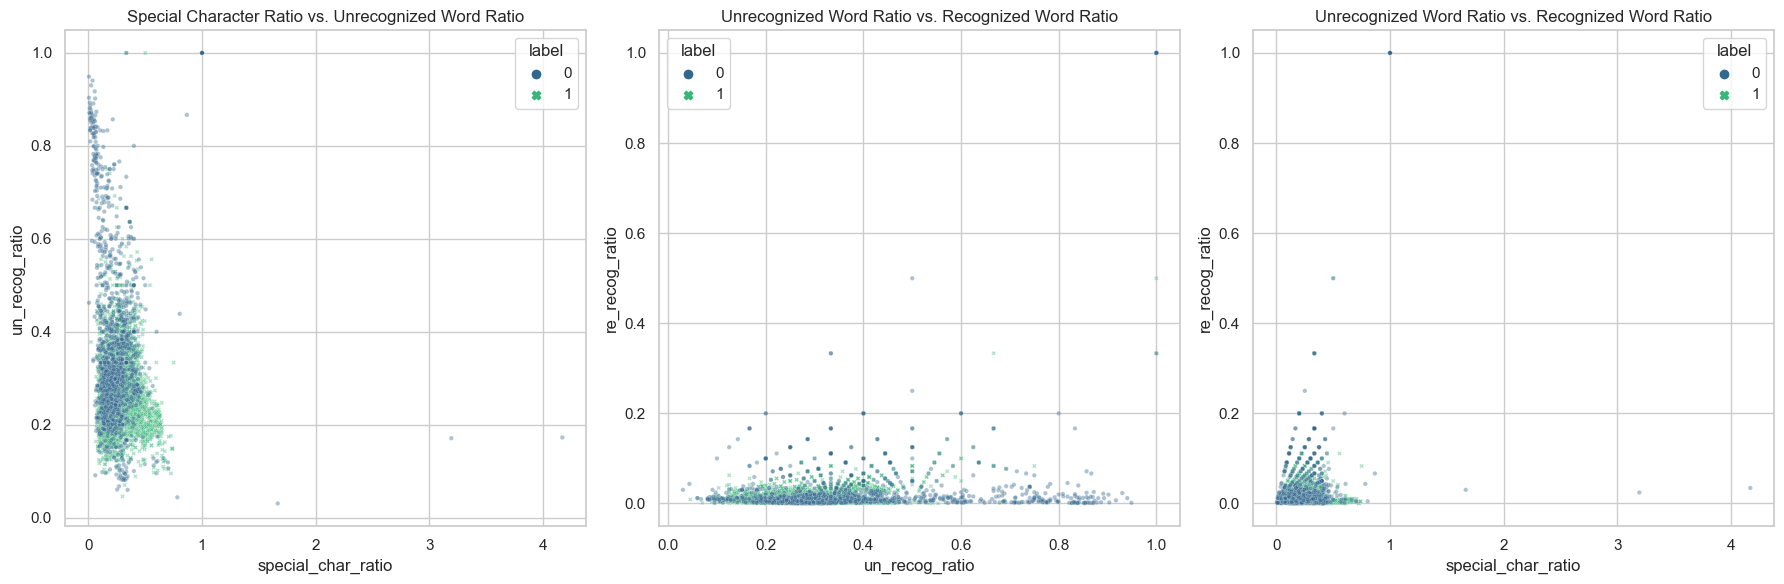

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: "money" AND "send"
# sns.scatterplot(ax=axes[0], data=data, x='money', y='send', hue='label', style='label', palette='viridis')
# axes[0].set_title('Money vs. Send')

# Plot 2: "special_char"/"total_word" AND "un_recog"/"total_word"
data['special_char_ratio'] = data['special_char'] / data['total_word']
data['un_recog_ratio'] = data['un_recog'] / data['total_word']
sns.scatterplot(ax=axes[0], data=data, x='special_char_ratio', y='un_recog_ratio', hue='label', style='label', palette='viridis' ,s=10,alpha=0.4)
axes[0].set_title('Special Character Ratio vs. Unrecognized Word Ratio')

# Plot 3: "un_recog"/"total_word" AND "re_recog"/"total_word"
data['re_recog_ratio'] = data['re_recog'] / data['total_word']
sns.scatterplot(ax=axes[1], data=data, x='un_recog_ratio', y='re_recog_ratio', hue='label', style='label', palette='viridis',s=10,alpha=0.4)
axes[1].set_title('Unrecognized Word Ratio vs. Recognized Word Ratio')

# Plot 3: "un_recog"/"total_word" AND "re_recog"/"total_word"
sns.scatterplot(ax=axes[2], data=data, x='special_char_ratio', y='re_recog_ratio', hue='label', style='label', palette='viridis',s=10,alpha=0.4)
axes[2].set_title('Unrecognized Word Ratio vs. Recognized Word Ratio')

plt.tight_layout()
plt.show()

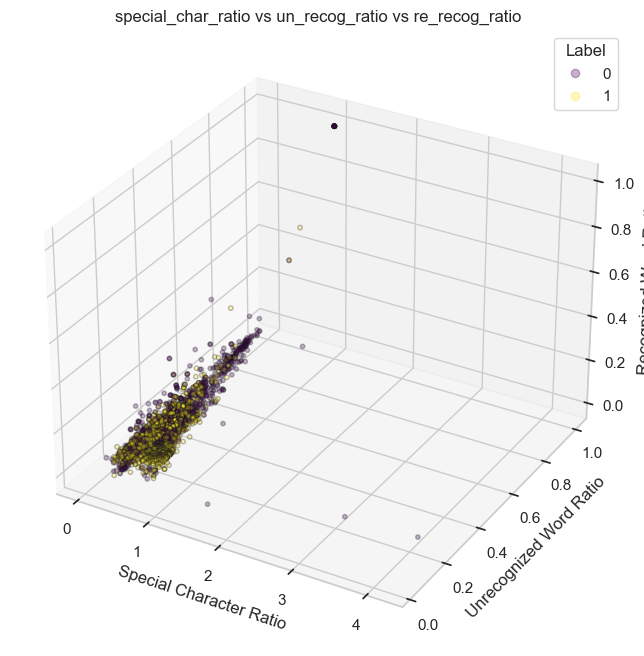

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data for 3D plot
x = data['special_char_ratio']
y = data['un_recog_ratio']
z = data['re_recog_ratio']

# Plot
scatter = ax.scatter(x, y, z, c=data['label'], cmap='viridis', marker='o', edgecolor='k', s=10, alpha=0.3)

# Legend and labels
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel('Special Character Ratio')
ax.set_ylabel('Unrecognized Word Ratio')
ax.set_zlabel('Recognized Word Ratio')

# Title
ax.set_title('special_char_ratio vs un_recog_ratio vs re_recog_ratio')

plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

# Prepare data for the four combinations
X1 = data[['money', 'send']]
X2 = data[['special_char_ratio', 'un_recog_ratio']]
X3 = data[['un_recog_ratio', 're_recog_ratio']]
X4 = data[['special_char_ratio', 'un_recog_ratio', 're_recog_ratio']]
y = data['label']

# Splitting the data into train and test sets for each combination
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42)
X3_train, X3_test = train_test_split(X3, test_size=0.2, random_state=42)
X4_train, X4_test = train_test_split(X4, test_size=0.2, random_state=42)

# Initialize and train linear regression models
model1 = LinearRegression().fit(X1_train, y_train)
model2 = LinearRegression().fit(X2_train, y_train)
model3 = LinearRegression().fit(X3_train, y_train)
model4 = LinearRegression().fit(X4_train, y_train)

# Predictions
y_pred1 = model1.predict(X1_test)
y_pred2 = model2.predict(X2_test)
y_pred3 = model3.predict(X3_test)
y_pred4 = model4.predict(X4_test)

def compute_accuracy(y_true, y_pred):
    y_pred_label = [1 if pred > 0.5 else 0 for pred in y_pred]
    return accuracy_score(y_true, y_pred_label)

accuracy1 = compute_accuracy(y_test, y_pred1)
accuracy2 = compute_accuracy(y_test, y_pred2)
accuracy3 = compute_accuracy(y_test, y_pred3)
accuracy4 = compute_accuracy(y_test, y_pred4)

print(accuracy1, accuracy2, accuracy3, accuracy4)

0.685077519379845 0.7277131782945736 0.7306201550387597 0.7296511627906976


In [18]:
from sklearn.svm import SVC


# Initialize and train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear').fit(X4_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X4_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(accuracy_svm)

0.7248062015503876


In [26]:
from sklearn.svm import SVC


# Initialize and train Support Vector Machine (SVM) model
svm_model = SVC(kernel='poly').fit(X4_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X4_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(accuracy_svm)

0.7412790697674418


In [27]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for SVM predictions on ['special_char_ratio', 'un_recog_ratio', 're_recog_ratio']
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Extract true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
tp = conf_matrix[1, 1]  # True Positive (Spam correctly identified as Spam)
fn = conf_matrix[1, 0]  # False Negative (Spam incorrectly identified as Non-Spam)
tn = conf_matrix[0, 0]  # True Negative (Non-Spam correctly identified as Non-Spam)
fp = conf_matrix[0, 1]  # False Positive (Non-Spam incorrectly identified as Spam)

tp, fn, tn, fp

(703, 4, 62, 263)

In [28]:
from sklearn.svm import SVC


# Initialize and train Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf').fit(X4_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X4_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(accuracy_svm)

0.7344961240310077


In [ ]:
# Remove the additional ratio columns added for previous analyses to use only the original attributes
X_all_original = data.drop(['label', 'special_char_ratio', 'un_recog_ratio', 're_recog_ratio'], axis=1)

# Splitting the data into train and test sets for all original attributes
X_all_original_train, X_all_original_test, _, _ = train_test_split(X_all_original, y, test_size=0.2, random_state=42)

# Initialize and train SVM model on all original features
svm_model_all_original = SVC(kernel='linear').fit(X_all_original_train, y_train)

# Predictions
y_pred_svm_all_original = svm_model_all_original.predict(X_all_original_test)

# Evaluation
accuracy_svm_all_original = accuracy_score(y_test, y_pred_svm_all_original)

print(accuracy_svm_all_original)

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for SVM predictions on ['special_char_ratio', 'un_recog_ratio', 're_recog_ratio']
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Extract true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
tp = conf_matrix[1, 1]  # True Positive (Spam correctly identified as Spam)
fn = conf_matrix[1, 0]  # False Negative (Spam incorrectly identified as Non-Spam)
tn = conf_matrix[0, 0]  # True Negative (Non-Spam correctly identified as Non-Spam)
fp = conf_matrix[0, 1]  # False Positive (Non-Spam incorrectly identified as Spam)

tp, fn, tn, fp

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Use the decision function to get the distance of each sample from the decision boundary
decision_function = svm_model.decision_function(X4_test)

# Find a range of potential thresholds to evaluate
thresholds = np.linspace(min(decision_function), max(decision_function), 100)

# Initialize variables to store the best threshold and its corresponding minimum false positives
min_fp = len(y_test)  # Initialize with max possible value, the total number of test samples
best_threshold = 0
best_fn = len(y_test)  # Similarly, initialize false negatives to max possible value

for threshold in thresholds:
    # Apply threshold to decision function to get new predictions
    y_pred_adjusted = [1 if d > threshold else 0 for d in decision_function]
    
    # Calculate confusion matrix
    conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    
    # Extract false positives (FP) and false negatives (FN)
    fp = conf_matrix_adjusted[0, 1]
    fn = conf_matrix_adjusted[1, 0]
    
    # Update minimum false positives and best threshold if current FP is lower
    if fp < min_fp or (fp == min_fp and fn < best_fn):
        min_fp = fp
        best_fn = fn
        best_threshold = threshold

# Evaluate model with best threshold
y_pred_best = [1 if d > best_threshold else 0 for d in decision_function]
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
tp_best = conf_matrix_best[1, 1]
fn_best = conf_matrix_best[1, 0]
tn_best = conf_matrix_best[0, 0]
fp_best = conf_matrix_best[0, 1]

print(best_threshold, tp_best, fn_best, tn_best, fp_best)

In [ ]:
optimal_threshold = None
best_metrics = (0, float('inf'), 0)  # Format: (True Positives, False Positives, Threshold)
max_tp_under_constraint = 0

for threshold in thresholds:
    # Apply the threshold to the decision function
    y_pred_adjusted = [1 if d > threshold else 0 for d in decision_function]
    
    # Calculate the confusion matrix for the adjusted predictions
    conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    tp = conf_matrix_adjusted[1, 1]
    fp = conf_matrix_adjusted[0, 1]
    
    # Ensure the True Spam/False Spam ratio is at least 10 if there are any false positives
    if fp > 0 and (tp / fp) >= 10:
        if tp > max_tp_under_constraint:
            max_tp_under_constraint = tp
            best_metrics = (tp, fp, threshold)

optimal_threshold = best_metrics[2]

# Evaluate the model with the newly found optimal threshold
y_pred_optimal_revision = [1 if d > optimal_threshold else 0 for d in decision_function]
conf_matrix_optimal_revision = confusion_matrix(y_test, y_pred_optimal_revision)
tp_optimal_revision = conf_matrix_optimal_revision[1, 1]
fp_optimal_revision = conf_matrix_optimal_revision[0, 1]
tn_optimal_revision = conf_matrix_optimal_revision[0, 0]
fn_optimal_revision = conf_matrix_optimal_revision[1, 0]
ratio_optimal_revision = tp_optimal_revision / max(1, fp_optimal_revision)  # Avoid division by zero

optimal_threshold, tp_optimal_revision, fp_optimal_revision, tn_optimal_revision, fn_optimal_revision, ratio_optimal_revision